In [1]:
from IPython.display import clear_output

In [2]:
!pip install pennylane

!pip install qutip

clear_output()

In [3]:
from pennylane import numpy as np

import math
import cmath

# Normalizing Qubits


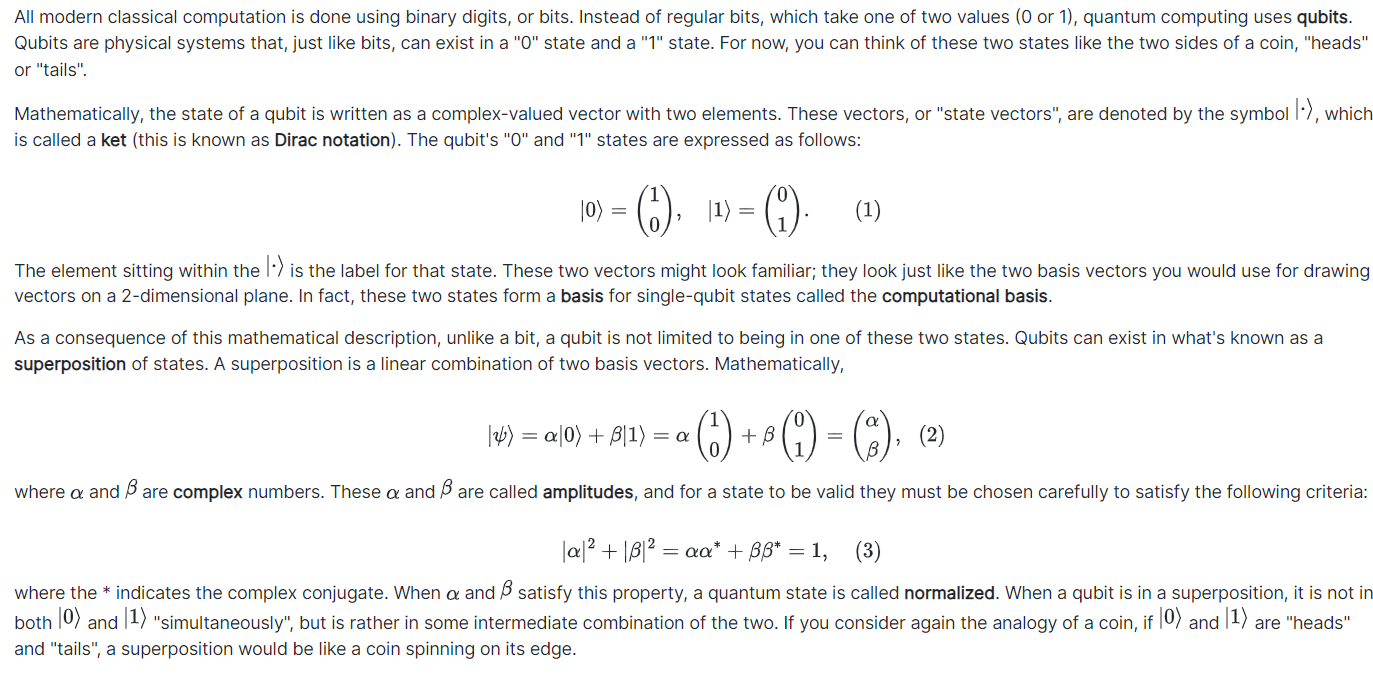

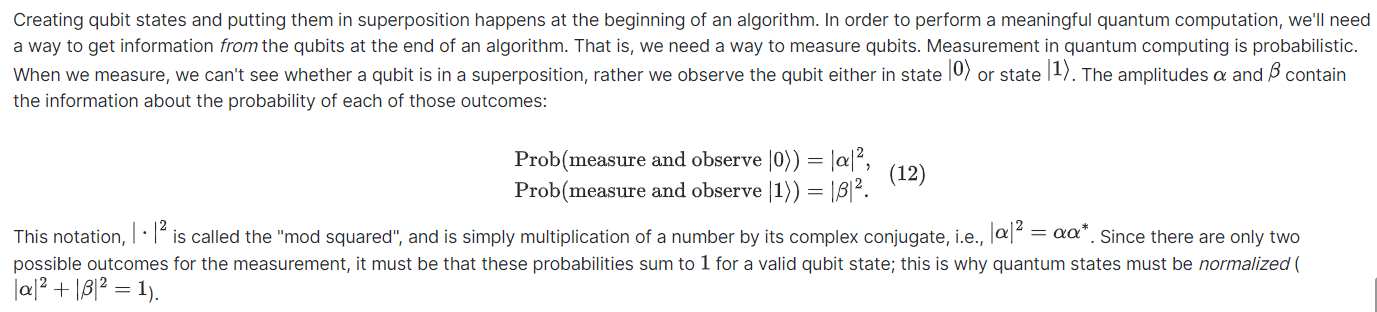

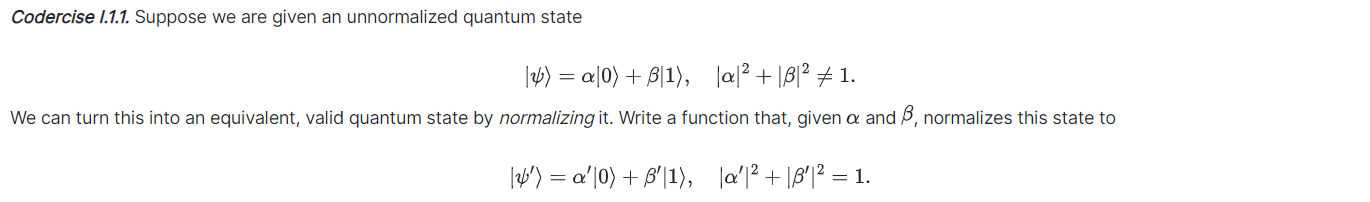

In [4]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])



def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1

    # RETURN A VECTOR

    sq = np.sqrt(np.sum([alpha*np.conj(alpha), beta*np.conj(beta)]))


    return (alpha/sq)*ket_0 + (beta/sq)*ket_1



In [5]:
print(normalize_state(2+1j, 3+1j*4))

[0.36514837+0.18257419j 0.54772256+0.73029674j]


# Measurement

In [ ]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES

    arr = [0, 1]

    # Computing measurement probabilities
    prob_0 = np.square(np.abs(state[0])) #prob = square(|prob amplitude|)
    prob_1 = np.square(np.abs(state[1]))

    measList = np.random.choice(arr, size = num_meas, p = [prob_0, prob_1])

    return measList




In [ ]:
print(measure_state([1/np.sqrt(2), 1/np.sqrt(2)], 10))

[0 0 0 1 1 1 0 1 0 1]


# Inner products

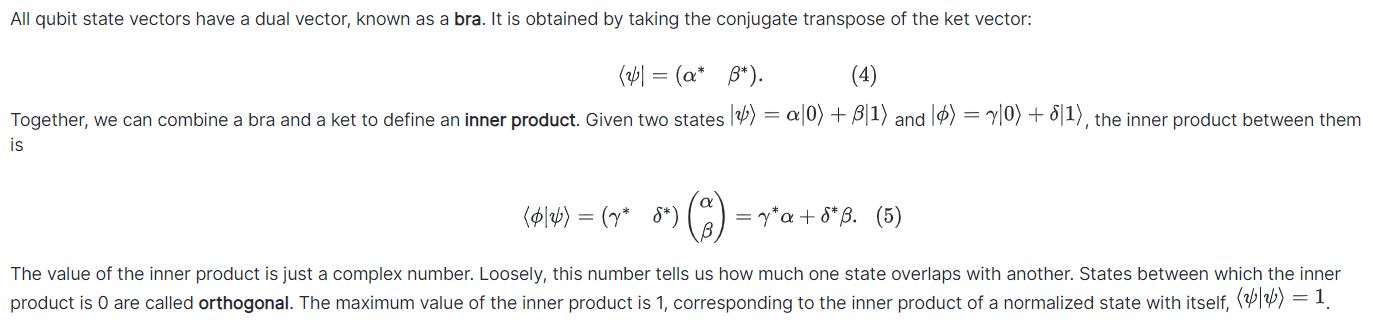

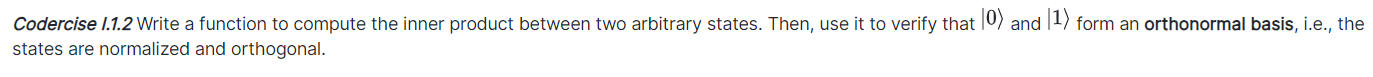

In [ ]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (array[complex]): A normalized quantum state vector
        state_2 (array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT

    sop = np.dot(np.conjugate(np.transpose(state_1)), state_2) # < state_1 | state_2>
    return sop


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


# Unitary Operations

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (array[complex]): A normalized quantum state vector.

    Returns:
        array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return np.dot(U, state)


# All-in-one

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE |0>   '
    q0 = np.array([1, 0])
    return q0




def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    q0 = initialize_state()
    apply_u(q0)
    return measure_state(q0, 100)



#Bloch Sphere

In [ ]:
import matplotlib as mpl
from pylab import *
from qutip import *
from matplotlib import cm
import imageio

def animate_bloch(states, duration=0.1, save_all=False):

    b = Bloch()
    b.vector_color = ['r']
    b.view = [-40,30]
    images=[]
    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    ## normalize colors to the length of data ##
    nrm = mpl.colors.Normalize(0,length)
    colors = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    b.point_color = list(colors) # options: 'r', 'g', 'b' etc.
    b.point_marker = ['o']
    b.point_size = [30]

    for i in range(length):
        b.clear()
        b.add_states(states[i])
        b.add_states(states[:(i+1)],'point')
        if save_all:
            b.save(dirc='tmp') #saving images to tmp directory
            filename="tmp/bloch_%01d.png" % i
        else:
            filename='temp_file.png'
            b.save(filename)
        images.append(imageio.imread(filename))
    imageio.mimsave('bloch_anim.gif', images, duration=duration)

/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [ ]:
states = []
thetas = linspace(0,pi,21)
for theta in thetas:
    states.append((cos(theta/2)*basis(2,0) + sin(theta/2)*(cmath.rect(1,-math.pi/3))*basis(2,1)).unit()) # you have to understand this part
animate_bloch(states, duration=0.1, save_all=False)

<ipython-input-13-16b9b80405a8>:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [ ]:
print(basis(2,0))

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


In [ ]:
for theta in thetas:
  states.append((cos(theta/2)*basis(2,0) +sin(theta/2)*basis(2,1)).unit())

animate_bloch(states, duration=0.1, save_all=False)

<ipython-input-13-16b9b80405a8>:37: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
